In [1]:
from gammapy.modeling.models import Models
from gammapy.datasets import Datasets

In [2]:
from astropy import units as u

In [3]:
from gammapy.modeling.models import SkyModel
from gammapy.modeling.models import PowerLawSpectralModel
from astropy.table import Table
from gammapy.modeling import Fit
from gammapy.modeling.models import LogParabolaSpectralModel

In [4]:
import os
import sys
import importlib
path_my_modules = 'my_modules'


module_path = os.path.abspath(f'{path_my_modules}/config')
if module_path not in sys.path:
    sys.path.append(module_path)

import cfg
importlib.reload(cfg)

<module 'cfg' from '/home/born-again/Documents/GitHub/roi_analysis_gammapy_catalogs/my_modules/config/cfg.py'>

In [5]:
module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_plot_style}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import plotter
importlib.reload(plotter)

None
None
None


<module 'plotter' from '/home/born-again/Documents/GitHub/roi_analysis_gammapy_catalogs/my_modules/plot_style/plotter.py'>

In [6]:
module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_utilities}')
if module_path not in sys.path:
    sys.path.append(module_path)

import utilities as utl
importlib.reload(utl)

<module 'utilities' from '/home/born-again/Documents/GitHub/roi_analysis_gammapy_catalogs/my_modules/utilities/utilities.py'>

In [7]:
module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_spectral_models}')
if module_path not in sys.path:
    sys.path.append(module_path)

import spectral_models as spec
importlib.reload(spec)

<module 'spectral_models' from '/home/born-again/Documents/GitHub/CTA_projects/my_modules/spectral_models/spectral_models.py'>

In [8]:
module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_gammapy_catalogs}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import gammapy_catalogs as gammapy_cat
importlib.reload(gammapy_cat)

None
None
None
None


<module 'gammapy_catalogs' from '/home/born-again/Documents/GitHub/roi_analysis_gammapy_catalogs/my_modules/gammapy_catalogs/gammapy_catalogs.py'>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt # A collection of command style functions


path_my_plot_style = f"{path_my_modules}/{cfg.dir_plot_style}/my_plot_style_2.txt" 
plt.style.use(path_my_plot_style)

In [10]:
from gammapy.utils.check import check_tutorials_setup
from gammapy.visualization.utils import plot_contour_line
check_tutorials_setup()


System:

	python_executable      : /home/born-again/anaconda3/envs/gammapy-1.0/bin/python 
	python_version         : 3.9.16     
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.0.1      
	path                   : /home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.23.5     
	scipy                  : 1.9.1      
	astropy                : 5.1.1      
	regions                : 0.6        
	click                  : 8.1.3      
	yaml                   : 6.0        
	IPython                : 8.4.0      
	jupyterlab             : 3.4.8      
	matplotlib             : 3.6.2      
	pandas                 : 1.5.0      
	healpy                 : 1.16.1     
	iminuit                : 2.17.0     
	sherpa                 : 4.15.0     
	naima                  : 0.10.0     
	emcee                  : 3.1.3      
	corner                 : 2.2.1      




<a id='intro'></a>
🔝 [Back to Top](#indice)<br>
## 1. Introduction 
A Python code to search for possible γ-ray counterparts to the target source and to perform the spectral model fitting. This code selects the sources (in the Gammapy source catalogs) within the region of interest (centered in the position of the target source) and finds the best fit for the given spectrum model. 

## Counterparts Analysis

In [11]:
importlib.reload(plotter)

<module 'plotter' from '/home/born-again/Documents/GitHub/roi_analysis_gammapy_catalogs/my_modules/plot_style/plotter.py'>

In [12]:
filename = "set_analysis.dat"
data = utl.getVarFromFile(filename)

In [13]:
source_name = data.source_name
pos_ra = data.pos_ra*u.Unit(cfg.unit_deg)
pos_dec = data.pos_dec*u.Unit(cfg.unit_deg)

In [15]:
source_info = utl.set_source_info()
source_info

{'name': 'LHAASO J1825-1326',
 'position': <SkyCoord (ICRS): (ra, dec) in deg
     (276.45, -13.45)>}

In [16]:
# REVER: chamar (com source_name, source_RA, source_dec) source_info dentro
# REVER: region_of_interest[name] -> region_of_interest[source_name]
region_of_interest = utl.create_region_of_interest()
region_of_interest

{'name': 'LHAASO J1825-1326',
 'position': <SkyCoord (ICRS): (ra, dec) in deg
     (276.45, -13.45)>,
 'radius_roi': <Quantity 1. deg>,
 'e_ref_min': None,
 'e_ref_max': None,
 'roi_name': 'LHAASO_J1825-1326_roi_1dot0deg'}

In [17]:
# df = utl.create_data_frame_counterparts(region_of_interest)
# display(df)
# print(df.to_latex()) # Render object to a LaTeX tabular, longtable, or nested table.

In [18]:
# print(df[["Source name","RA(deg)","dec.(deg)","Sep.(deg)","Flux points"]].to_latex(index=False)) # Render object to a LaTeX tabular, longtable, or nested table.
# print(df.to_latex(index=False)) # Render object to a LaTeX tabular, longtable, or nested table.

In [19]:
sources_gammapy, datasets_gammapy, models_gammapy = gammapy_cat.get_datasets_flux_points_gammapy(region_of_interest)

The error is: (2HWC J1825-134) 'SourceCatalogObject2HWC' object has no attribute 'flux_points'
The error is: (3HWC J1825-134) 'SourceCatalogObject3HWC' object has no attribute 'flux_points'
Total number of counterparts: 18
Total number of flux points tables: 16


In [22]:
datasets_roi = datasets_gammapy.copy()

In [23]:
datasets_name = "region_of_interest" 
utl.write_datasets_models(datasets_roi,region_of_interest, datasets_name)

In [24]:
datasets_read = utl.read_datasets_models(region_of_interest, "counterparts_gammapy")

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [25]:
dict_leg_style = plotter.set_leg_style({}, datasets = datasets_roi, color = None, marker = None)

In [26]:
sed_type = cfg.sed_type_e2dnde
dict_plot_axis = dict(
    label =  (r'$\rm{E\ [TeV] }$', r'$\rm{E^2\ J(E)\ [TeV\ cm^{-2}\ s^{-1}] }$'),
    units =  (          'TeV',                       'TeV  cm-2     s-1')
)
dict_leg_place = dict(
    bbox_to_anchor = (0, -0.45), # Set legend outside plot
    ncol=3, 
    loc='lower left', 
)
dict_plot_limits = dict(
    energy_bounds = [1e-5, 3e3] * u.TeV,
    ylim = [1e-16, 1e-7]
)

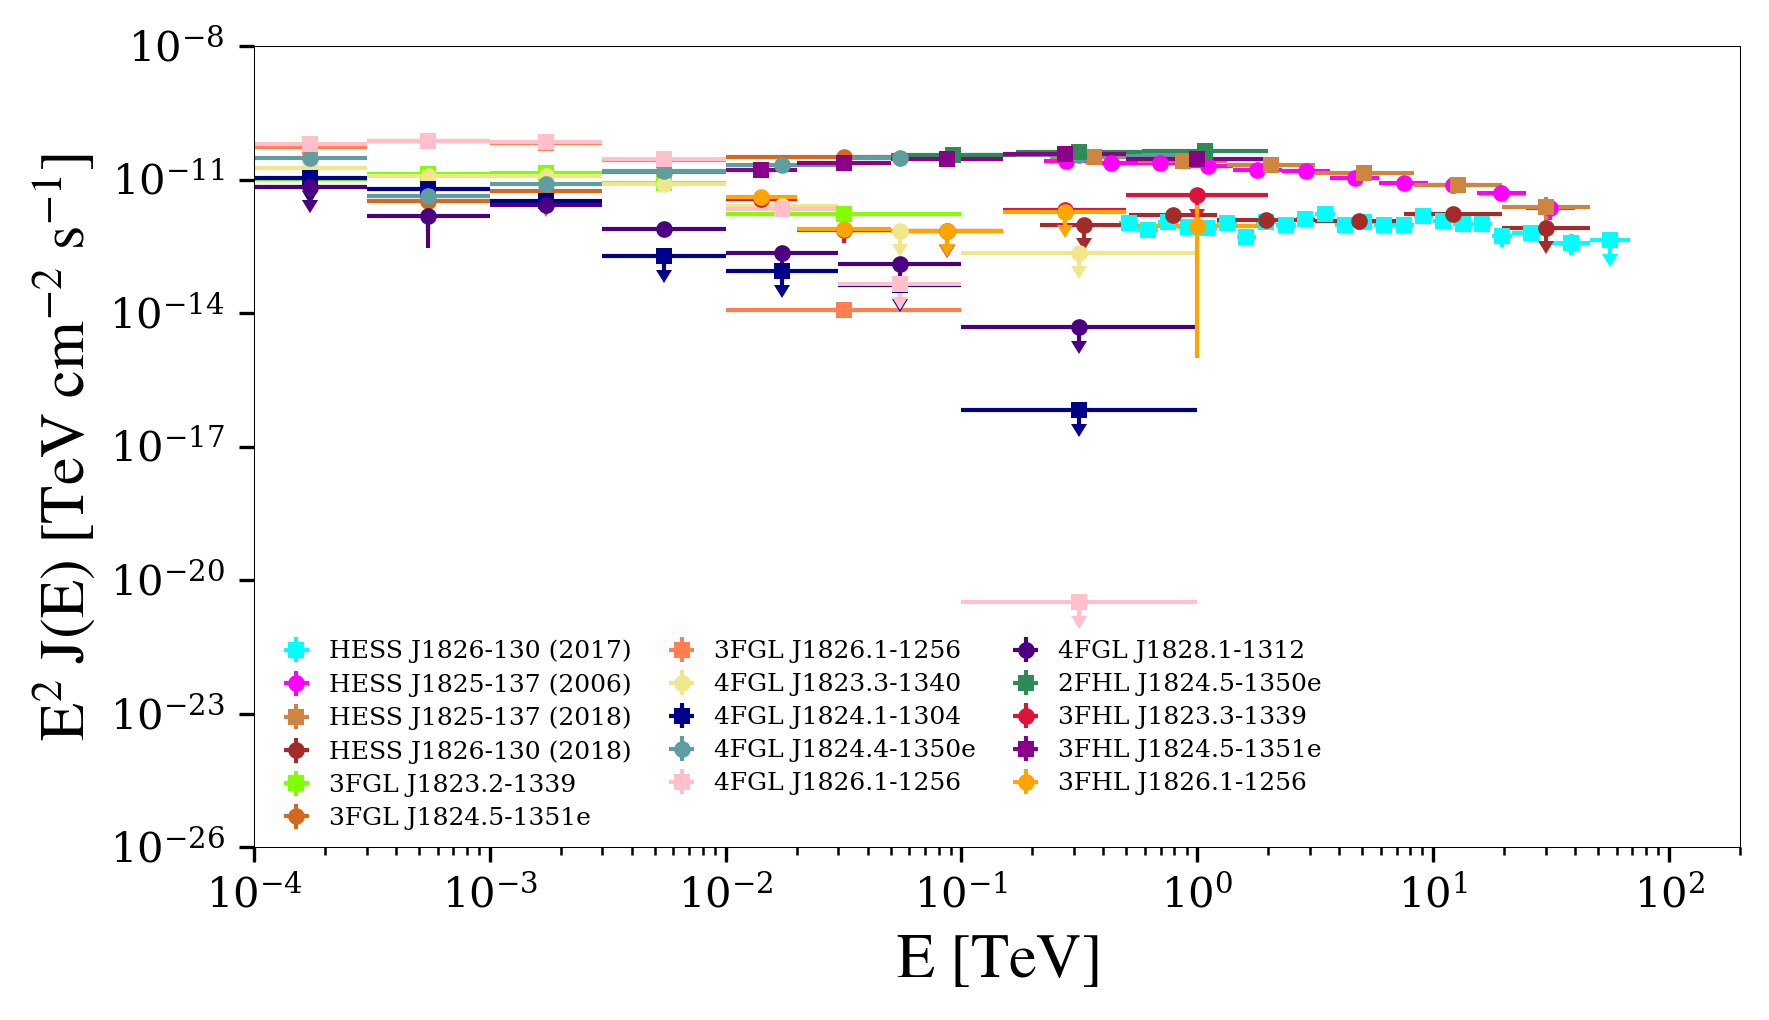

In [27]:
datasets_name = "test"
datasets = Datasets(datasets_roi)
dict_plot_limits = dict(
    energy_bounds = [1e-4, 2e2] * u.TeV,
    ylim = [1e-26, 1e-8]
)

plotter.plot_SED(name = datasets_name, dict_plot_limits=dict_plot_limits,datasets=datasets, dict_leg_style=dict_leg_style, region_of_interest=region_of_interest)

In [28]:
# datasets = Datasets(datasets_read)
# dict_plot_limits = dict(
#     energy_bounds = [1e-4, 2e2] * u.TeV,
#     ylim = [1e-26, 1e-8]
# )
# plotter.plot_SED(dict_plot_limits=dict_plot_limits,datasets=datasets, dict_leg_style=dict_leg_style, region_of_interest=region_of_interest, name = "test")

In [29]:
# plot.SED_from_catalogs(
#     sources_gammapy, 
#     datasets_gammapy, 
#     models_gammapy,
#     dict_leg_style,
#     region_of_interest,
#     sed_type = sed_type, 
#     dict_plot_axis=dict_plot_axis,
#     energy_bounds = [1e-5, 1e2] * u.TeV, 
#     ylim = [1e-13, 1e-9]
# )

In [30]:
sky_model = spec.sky_model_ecpl()
sky_model = utl.fit_Datasets(datasets_roi,sky_model)

/home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:620: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/gammapy/datasets/flux_points.py:288: RuntimeWarning: overflow encountered in square
  return ((data - model) / sigma.quantity[:, 0, 0]).to_value("") ** 2


  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral     index 8.8408e-01                ... nan  False   False     
spectral amplitude 1.5848e-13 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 1.0000e+01            TeV ... nan   True   False     
spectral   lambda_ 2.7887e-01          TeV-1 ... nan  False   False     
spectral     alpha 1.0000e+00                ... nan   True   False     
15912.267564697866


NameError: name 'region_of_interest' is not defined

In [ ]:
datasets = Datasets(datasets_roi)
models=[sky_model]
dict_leg_style = plotter.set_leg_style(dict_leg_style, models = models)
dict_plot_limits = dict(
    energy_bounds = [5e-2, 2e3] * u.TeV,
    ylim = [1e-15, 1e-9]
)
plotter.plot_SED(dict_plot_limits=dict_plot_limits,datasets=datasets,models=models, dict_leg_style=dict_leg_style, region_of_interest=region_of_interest, name = "test")